In [2]:
import cfgrib
import numpy as np

In [3]:
from cfgrib import open_dataset


In [15]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy

In [4]:
ds = open_dataset(r"C:\Users\user\Downloads\adaptor.mars.external-1704917997.7133834-21350-14-9017e6e4-010a-45d4-9fe3-fd9b866fda91.grib")


In [ ]:

ds

In [ ]:
### Getting datasets for Romania

In [6]:
ds_vwiltm = open_dataset(r"C:\Users\user\Downloads\adaptor.mars.external-1704962922.4568803-26733-1-aab36616-2756-4a09-8912-5e409b3c5b5a.grib")

In [7]:
ds_vwiltm

<xarray.Dataset>
Dimensions:     (time: 36, soilLayer: 14, y: 1069, x: 1069)
Coordinates:
  * time        (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-28T12:0...
    step        timedelta64[ns] ...
  * soilLayer   (soilLayer) float64 1.0 2.0 3.0 4.0 5.0 ... 11.0 12.0 13.0 14.0
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    vwiltm      (time, soilLayer, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-01-14T17:48 GRIB to CDM+CF via cfgrib-0.9.1...

In [11]:
first_10_longitudes = ds_vwiltm['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-17.486      -17.44187394 -17.39772944 -17.35356652 -17.30938521
 -17.26518553 -17.22096749 -17.1767311  -17.1324764  -17.08820341]


In [10]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_vwiltm['longitude'] = convert_longitude(ds_vwiltm['longitude'])

In [12]:
ds_vwiltm_flipped = ds_vwiltm.assign_coords(latitude=np.flip(ds_vwiltm["latitude"], axis = 0))


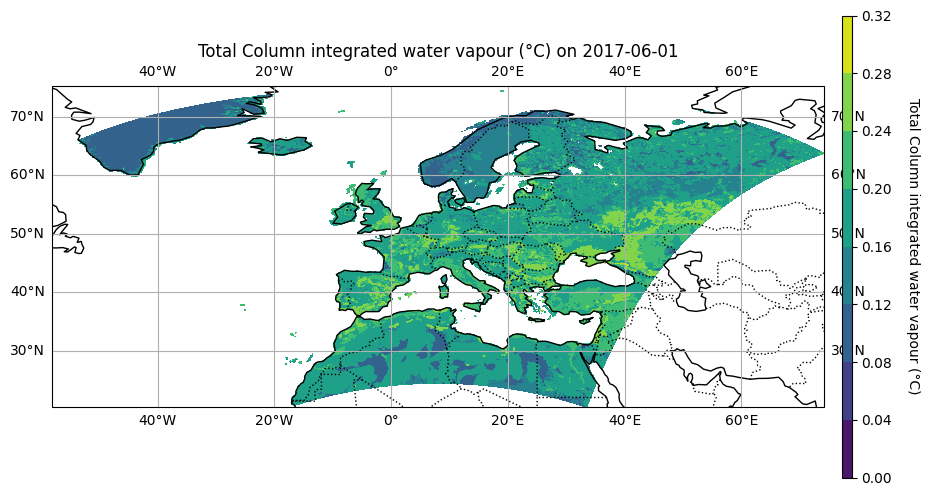

In [16]:
# masked_selected_data = ds_volumetric_wilting_point.sel(time='2017-06-01T12:00:00', soilLayer = 1)['vwiltm']
masked_selected_data = ds_vwiltm_flipped.sel(time='2017-06-01T12:00:00', soilLayer=1)['vwiltm']

# masked_selected_data["latitude"] = np.flip(masked_selected_data["latitude"], axis=0)

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Total Column integrated water vapour (°C)')
cbar.set_label('Total Column integrated water vapour (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Total Column integrated water vapour (°C) on 2017-06-01')

# Display the plot
plt.show()

In [31]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = 20.021389  # replace with your desired minimum latitude
lon_max = 29.852778   # replace with your desired maximum latitude
lat_min = 43.632222  # replace with your desired minimum longitude
lat_max = 48.403889   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
masked_ds_volumetric_wilting_point_romania = ds_vwiltm_flipped.where(
    (ds_vwiltm_flipped.latitude >= lat_min) & (ds_vwiltm_flipped.latitude <= lat_max) &
    (ds_vwiltm_flipped.longitude >= lon_min) & (ds_vwiltm_flipped.longitude <= lon_max), drop=True)


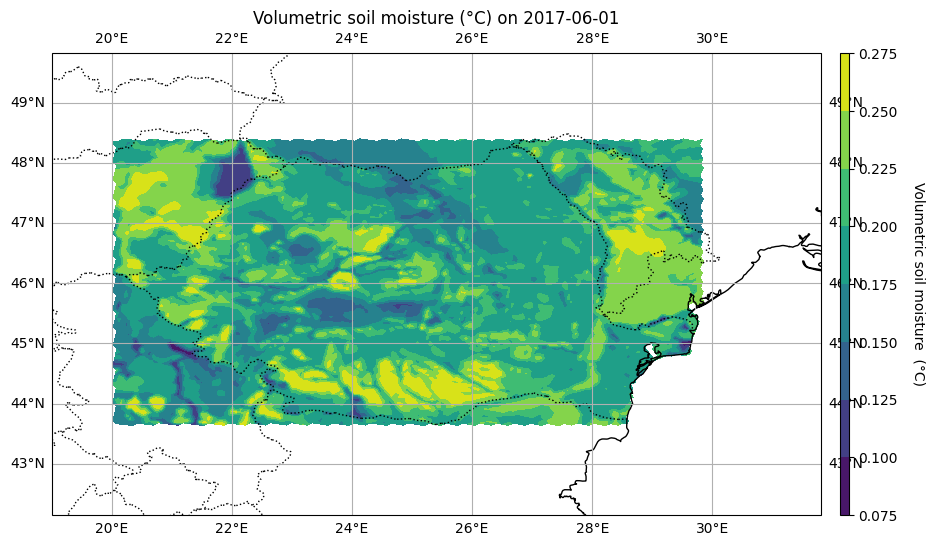

In [32]:
masked_selected_data = masked_ds_volumetric_wilting_point_romania.sel(time='2017-06-01T12:00:00', soilLayer = 10)['vwiltm']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Volumetric soil moisture (°C)')
cbar.set_label('Volumetric soil moisture  (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Volumetric soil moisture (°C) on 2017-06-01')

# Display the plot
plt.show()

In [35]:
import pandas as pd

# Preparing data for DataFrame
ds_selected_year = masked_ds_volumetric_wilting_point_romania.sel(time=masked_ds_volumetric_wilting_point_romania['time'].dt.year == 2017)

data = []

# Initialize dictionaries to hold the sum and count of VSW values for each latitude and longitude pair for each soil layer
vwiltm_sum_dict = {}
vwiltm_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and VSW values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    vwiltm_values = selected_time['vwiltm'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            
            for soil_layer in range(vwiltm_values.shape[0]):
                vwiltm_sum_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vwiltm_count_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vwiltm_sum_dict[lat_long_pair][soil_layer] += vwiltm_values[soil_layer, i, j]
                vwiltm_count_dict[lat_long_pair][soil_layer] += 1

# Calculate the average VSW for each latitude and longitude pair for each soil layer
data = []

vwiltm_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

for lat_long_pair, layer_data in vwiltm_sum_dict.items():
    lat, lon = lat_long_pair
    for soil_layer in range(vwiltm_values.shape[0]):
        avg_vwiltm = layer_data.get(soil_layer, 0) / vwiltm_count_dict[lat_long_pair].get(soil_layer, 1)  # Avoid division by zero
        vwiltm_sum_dict[lat_long_pair][soil_layer] = avg_vwiltm
        vwiltm_count_dict[lat_long_pair][soil_layer] += 1

for lat_long_pair, layer_data in vwiltm_sum_dict.items():
    lat, lon = lat_long_pair
    data.append([lat, lon, vwiltm_sum_dict[lat_long_pair][0]])

print(data)

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_vwiltm_0'])
df = df.dropna()
# df.to_csv('vwiltm_processed.csv', index=False)


[[49.83261559568386, 20.402069233550066, nan], [49.824427111708644, 20.477685211709968, nan], [49.81618932991761, 20.553275452676672, nan], [49.80790227578911, 20.628839815252007, nan], [49.79956597494142, 20.704378158545865, nan], [49.791180453132725, 20.779890341977477, nan], [49.78274573626057, 20.855376225276643, nan], [49.77426185036179, 20.93083566848526, nan], [49.765728821612065, 21.006268531958483, nan], [49.75714667632564, 21.08167467636622, nan], [49.74851544095517, 21.157053962694164, nan], [49.739835142091195, 21.232406252245397, nan], [49.73110580646208, 21.307731406641494, nan], [49.722327460933464, 21.383029287823774, nan], [49.71350013250823, 21.458299758054807, nan], [49.704623848325966, 21.53354267991932, nan], [49.69569863566281, 21.6087579163258, nan], [49.68672452193107, 21.683945330507527, nan], [49.67770153467898, 21.75910478602384, nan], [49.668629701590326, 21.83423614676144, nan], [49.65950905048414, 21.909339276935498, nan], [49.65033960931449, 21.9844140410

In [37]:
df.to_csv('vwiltm_romania_processed.csv', index=False)

In [ ]:
# 

In [40]:
ds_t2m = open_dataset(r"C:\Users\user\Downloads\adaptor.mars.external-1704917997.7133834-21350-14-9017e6e4-010a-45d4-9fe3-fd9b866fda91.grib")

In [44]:
first_10_longitudes = ds_t2m['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-17.486      -17.44187394 -17.39772944 -17.35356652 -17.30938521
 -17.26518553 -17.22096749 -17.1767311  -17.1324764  -17.08820341]


In [43]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_t2m['longitude'] = convert_longitude(ds_t2m['longitude'])

In [46]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = 20.021389  # replace with your desired minimum latitude
lon_max = 29.852778   # replace with your desired maximum latitude
lat_min = 43.632222  # replace with your desired minimum longitude
lat_max = 48.403889   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
ds_t2m_romania = ds_t2m.where(
    (ds_t2m.latitude >= lat_min) & (ds_t2m.latitude <= lat_max) &
    (ds_t2m.longitude >= lon_min) & (ds_t2m.longitude <= lon_max), drop=True)


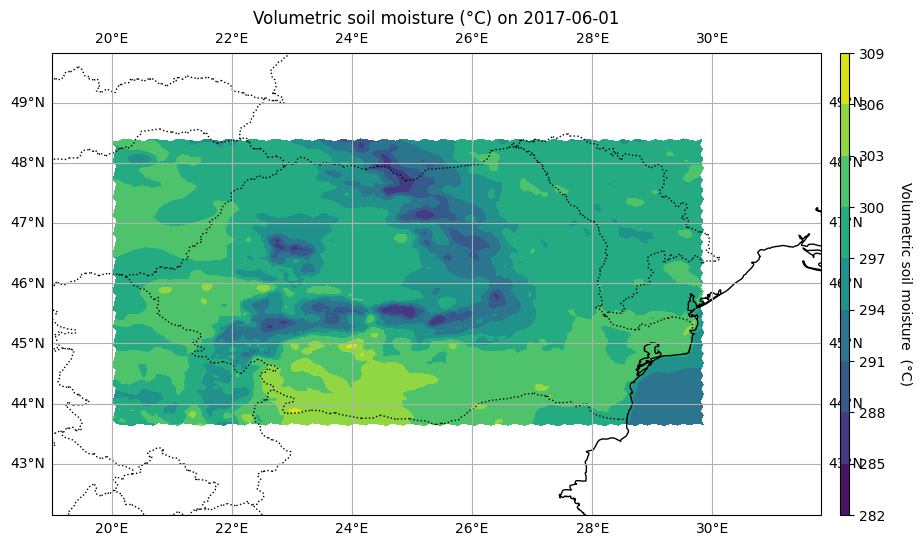

In [48]:
masked_selected_data = ds_t2m_romania.sel(time='2017-06-01T12:00:00')['t2m']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Volumetric soil moisture (°C)')
cbar.set_label('Volumetric soil moisture  (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Volumetric soil moisture (°C) on 2017-06-01')

# Display the plot
plt.show()

In [49]:
# Preparing data for DataFrame
ds_selected_year = ds_t2m_romania.sel(time=ds_t2m_romania['time'].dt.year == 2017)

data = []
# Initialize dictionaries to hold the sum and count of TCIWV values for each latitude and longitude pair
t2m_sum_dict = {}
t2m_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and tciwv values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    t2m = selected_time['t2m'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            t2m_sum_dict.setdefault(lat_long_pair, 0)
            t2m_count_dict.setdefault(lat_long_pair, 0)
            t2m_sum_dict[lat_long_pair] += t2m[i, j]
            t2m_count_dict[lat_long_pair] += 1

# Calculate the average TCIWV for each latitude and longitude pair
avg_t2m = {key: t2m_sum_dict[key] / t2m_count_dict[key] for key in t2m_sum_dict.keys()}

# Preparing data for DataFrame
data = [[lat, lon, avg] for (lat, lon), avg in avg_t2m.items()]

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_t2m'])
df = df.dropna()
# df.to_csv('t2m_processed.csv', index=False)

In [51]:
df.to_csv('t2m_romania_processed.csv', index=False)

In [ ]:
# TCIWV Romania

In [54]:
ds_tciwv = open_dataset(r"C:\Users\user\Documents\an3\Licenta\adaptor.mars.external-1704400805.668568-31426-3-fdb62112-b9b9-40ce-a767-76614e4d357d.grib")


In [59]:
first_10_longitudes = ds_tciwv['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-18.32       -18.2337158  -18.14736318 -18.06094227 -17.9744532
 -17.88789611 -17.80127115 -17.71457844 -17.62781813 -17.54099036]


In [58]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_tciwv['longitude'] = convert_longitude(ds_tciwv['longitude'])

In [60]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = 20.021389  # replace with your desired minimum latitude
lon_max = 29.852778   # replace with your desired maximum latitude
lat_min = 43.632222  # replace with your desired minimum longitude
lat_max = 48.403889   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
ds_tciwv_romania = ds_tciwv.where(
    (ds_tciwv.latitude >= lat_min) & (ds_tciwv.latitude <= lat_max) &
    (ds_tciwv.longitude >= lon_min) & (ds_tciwv.longitude <= lon_max), drop=True)


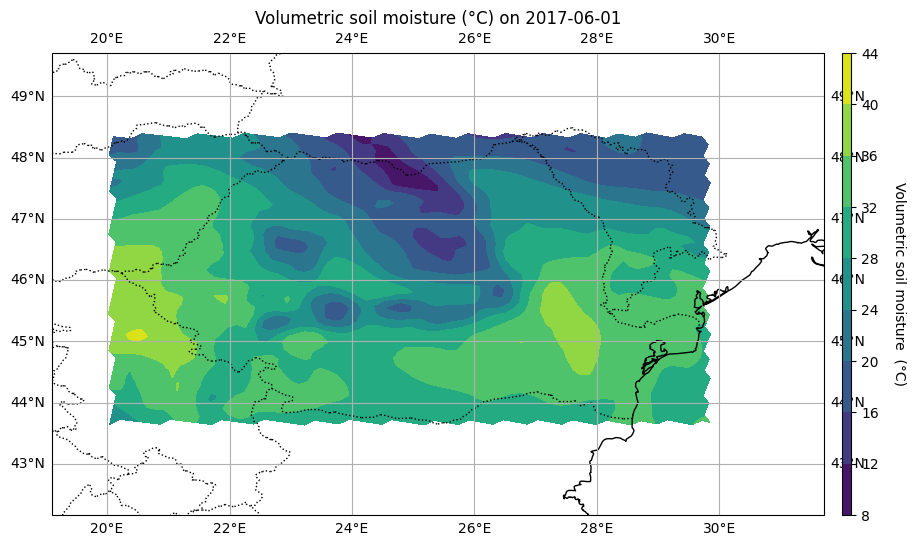

In [61]:
masked_selected_data = ds_tciwv_romania.sel(time='2017-06-01T12:00:00')['tciwv']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Volumetric soil moisture (°C)')
cbar.set_label('Volumetric soil moisture  (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Volumetric soil moisture (°C) on 2017-06-01')

# Display the plot
plt.show()

In [62]:
# Preparing data for DataFrame
ds_selected_year = ds_tciwv_romania.sel(time=ds_tciwv_romania['time'].dt.year == 2017)

data = []
# Initialize dictionaries to hold the sum and count of TCIWV values for each latitude and longitude pair
tciwv_sum_dict = {}
tciwv_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and tciwv values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    tciwv = selected_time['tciwv'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            tciwv_sum_dict.setdefault(lat_long_pair, 0)
            tciwv_count_dict.setdefault(lat_long_pair, 0)
            tciwv_sum_dict[lat_long_pair] += tciwv[i, j]
            tciwv_count_dict[lat_long_pair] += 1

# Calculate the average TCIWV for each latitude and longitude pair
avg_tciwv = {key: tciwv_sum_dict[key] / tciwv_count_dict[key] for key in tciwv_sum_dict.keys()}

# Preparing data for DataFrame
data = [[lat, lon, avg] for (lat, lon), avg in avg_tciwv.items()]

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_TCIWV_2017'])
df = df.dropna()
# df.to_csv('TCIWV_processed.csv', index=False)

In [64]:
df.to_csv('TCIWV_romania_processed.csv', index=False)

In [72]:
ds_vsw = open_dataset(r"C:\Users\user\Documents\an3\Licenta\adaptor.mars.external-1704388875.0963736-31582-15-66ec8e97-427f-4435-9323-2367638322d9.grib")


In [75]:
first_10_longitudes = ds_vsw['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-18.32       -18.2337158  -18.14736318 -18.06094227 -17.9744532
 -17.88789611 -17.80127115 -17.71457844 -17.62781813 -17.54099036]


In [74]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_vsw['longitude'] = convert_longitude(ds_vsw['longitude'])

In [78]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = 20.021389  # replace with your desired minimum latitude
lon_max = 29.852778   # replace with your desired maximum latitude
lat_min = 43.632222  # replace with your desired minimum longitude
lat_max = 48.403889   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
ds_vsw_romania = ds_vsw.where(
    (ds_vsw.latitude >= lat_min) & (ds_vsw.latitude <= lat_max) &
    (ds_vsw.longitude >= lon_min) & (ds_vsw.longitude <= lon_max), drop=True)


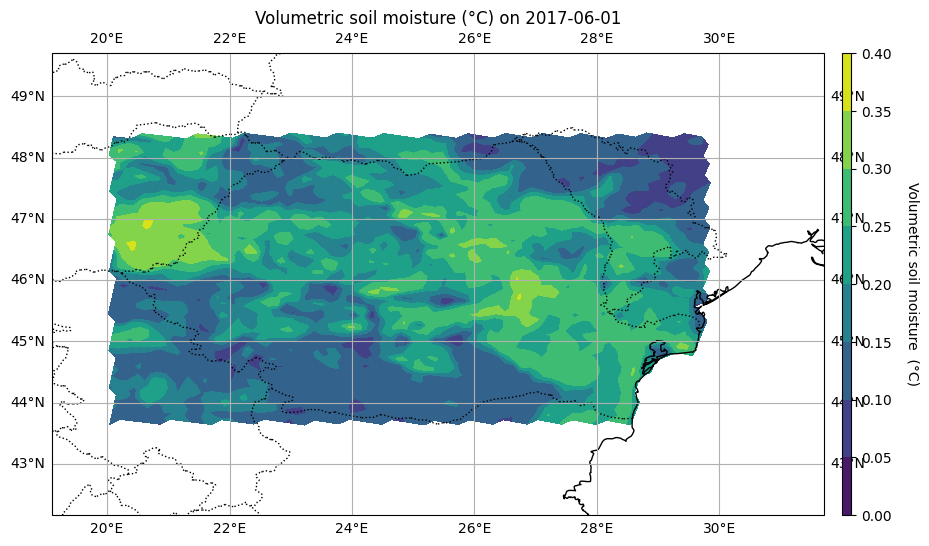

In [81]:
masked_selected_data = ds_vsw_romania.sel(time='2017-06-01T12:00:00', soilLayer = 1)['vsw']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Volumetric soil moisture (°C)')
cbar.set_label('Volumetric soil moisture  (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Volumetric soil moisture (°C) on 2017-06-01')

# Display the plot
plt.show()

In [82]:
import pandas as pd

# Preparing data for DataFrame
ds_selected_year = ds_vsw_romania.sel(time=ds_vsw_romania['time'].dt.year == 2017)

data = []

# Initialize dictionaries to hold the sum and count of VSW values for each latitude and longitude pair for each soil layer
vsw_sum_dict = {}
vsw_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and VSW values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    vsw_values = selected_time['vsw'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            
            for soil_layer in range(vsw_values.shape[0]):
                vsw_sum_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vsw_count_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vsw_sum_dict[lat_long_pair][soil_layer] += vsw_values[soil_layer, i, j]
                vsw_count_dict[lat_long_pair][soil_layer] += 1

# Calculate the average VSW for each latitude and longitude pair for each soil layer
avg_vsw = {}

for lat_long_pair, layer_data in vsw_sum_dict.items():
    lat, lon = lat_long_pair
    avg_vsw_0 = layer_data.get(0, 0) / vsw_count_dict[lat_long_pair].get(0, 1)  # Avoid division by zero
    avg_vsw_1 = layer_data.get(1, 0) / vsw_count_dict[lat_long_pair].get(1, 1)  # Avoid division by zero
    
    data.append([lat, lon, avg_vsw_0, avg_vsw_1])

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_VSW_0', 'Avg_VSW_1'])
df = df.dropna()
# df.to_csv('VSW_processed.csv', index=False)


In [84]:
df.to_csv('VSW_romania_processed.csv', index=False)


In [ ]:
ds_vsw

In [ ]:
ds_tciwv

In [45]:
ds_soil_temperature

<xarray.Dataset>
Dimensions:     (time: 1538, soil: 3, y: 565, x: 565)
Coordinates:
  * time        (time) datetime64[ns] 2011-01-01T12:00:00 ... 2019-07-29T12:0...
    step        timedelta64[ns] ...
  * soil        (soil) float64 1.0 2.0 3.0
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    sot         (time, soil, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             eswi
    GRIB_centreDescription:  Norrkoping
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Norrkoping
    history:                 2024-01-13T15:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [49]:
first_10_longitudes = ds_soil_temperature['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-18.32       -18.2337158  -18.14736318 -18.06094227 -17.9744532
 -17.88789611 -17.80127115 -17.71457844 -17.62781813 -17.54099036]


In [48]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_soil_temperature['longitude'] = convert_longitude(ds_soil_temperature['longitude'])

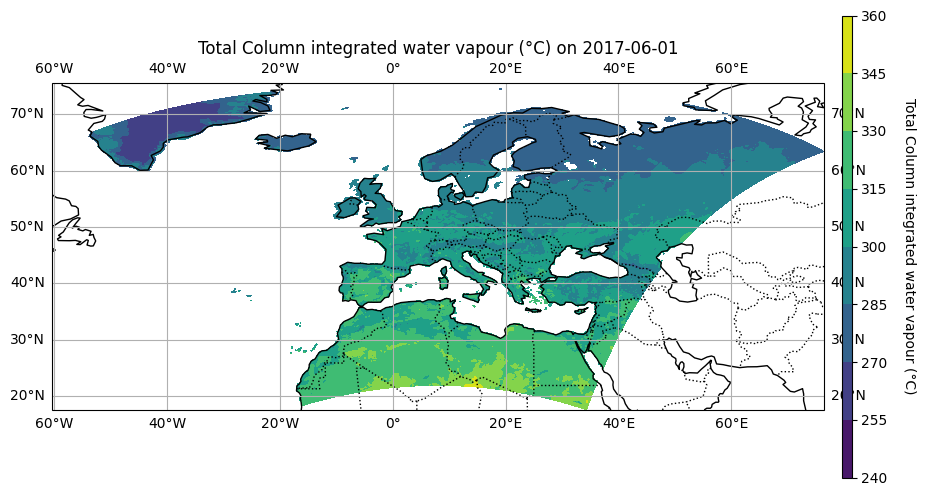

In [52]:
masked_selected_data = ds_soil_temperature.sel(time='2017-06-01T12:00:00', soil = 1)['sot']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Total Column integrated water vapour (°C)')
cbar.set_label('Total Column integrated water vapour (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Total Column integrated water vapour (°C) on 2017-06-01')

# Display the plot
plt.show()

In [56]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = -5.314167  # replace with your desired minimum latitude
lon_max = -0.761667   # replace with your desired maximum latitude
lat_min = 46.8675  # replace with your desired minimum longitude
lat_max = 49.257778   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
ds_soil_temperature1 = ds_soil_temperature.sel(time=ds_soil_temperature['time'].dt.year == 2017)
# masked_ds_soil_temperature = ds_soil_temperature1.where(
#     (ds_soil_temperature1.latitude >= lat_min) & (ds_soil_temperature1.latitude <= lat_max) &
#     (ds_soil_temperature1.longitude >= lon_min) & (ds_soil_temperature1.longitude <= lon_max), drop=True)
# subset = ds_soil_temperature.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max))

lat_start, lat_end = 46.8675 , 49.257778   # replace with your actual values
lon_start, lon_end = -5.314167  , -0.761667  # replace with your actual values

# Create a boolean mask for the latitude and longitude ranges
lat_mask = (ds_soil_temperature['latitude'] >= lat_start) & (ds_soil_temperature['latitude'] <= lat_end)
lon_mask = (ds_soil_temperature['longitude'] >= lon_start) & (ds_soil_temperature['longitude'] <= lon_end)

# Combine the masks to get one overall mask
combined_mask = lat_mask & lon_mask

# Use the `.where()` method with the combined mask and specify `drop=True` to drop values where the mask is False
subset = ds_soil_temperature.where(combined_mask, drop=True)



OSError: [Errno 22] Invalid argument

In [98]:
ds_2m_temperature = open_dataset(r"C:\Users\user\Downloads\adaptor.mars.external-1704917997.7133834-21350-14-9017e6e4-010a-45d4-9fe3-fd9b866fda91.grib")


In [99]:
ds_2m_temperature

<xarray.Dataset>
Dimensions:            (time: 36, y: 1069, x: 1069)
Coordinates:
  * time               (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-...
    step               timedelta64[ns] ...
    heightAboveGround  float64 ...
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                (time, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-01-12T18:49 GRIB to CDM+CF via cfgrib-0.9.1...

In [102]:
first_10_longitudes = ds_2m_temperature['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-17.486      -17.44187394 -17.39772944 -17.35356652 -17.30938521
 -17.26518553 -17.22096749 -17.1767311  -17.1324764  -17.08820341]


In [101]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_2m_temperature['longitude'] = convert_longitude(ds_2m_temperature['longitude'])

In [104]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = -5.314167  # replace with your desired minimum latitude
lon_max = -0.761667   # replace with your desired maximum latitude
lat_min = 46.8675  # replace with your desired minimum longitude
lat_max = 49.257778   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
masked_ds_2m_temperature = ds_2m_temperature.where(
    (ds_2m_temperature.latitude >= lat_min) & (ds_2m_temperature.latitude <= lat_max) &
    (ds_2m_temperature.longitude >= lon_min) & (ds_2m_temperature.longitude <= lon_max), drop=True)


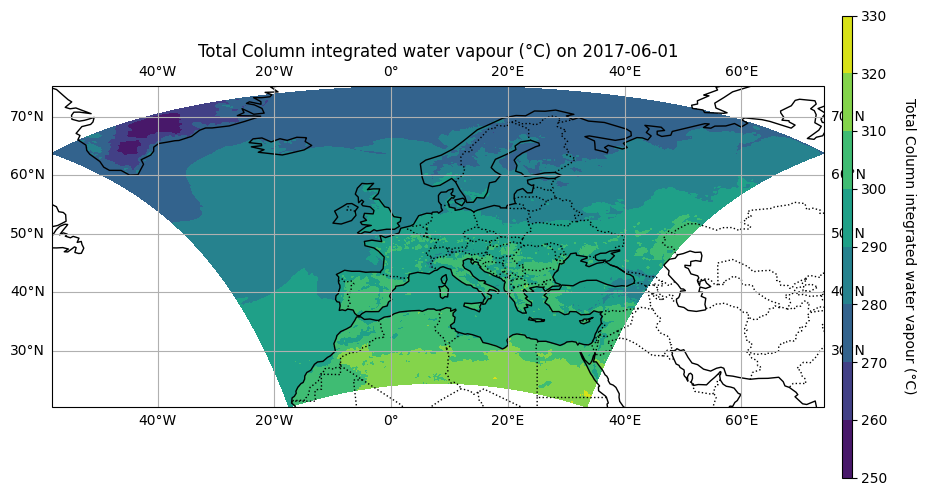

In [103]:
masked_selected_data = ds_2m_temperature.sel(time='2017-06-01T12:00:00')['t2m']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Total Column integrated water vapour (°C)')
cbar.set_label('Total Column integrated water vapour (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Total Column integrated water vapour (°C) on 2017-06-01')

# Display the plot
plt.show()

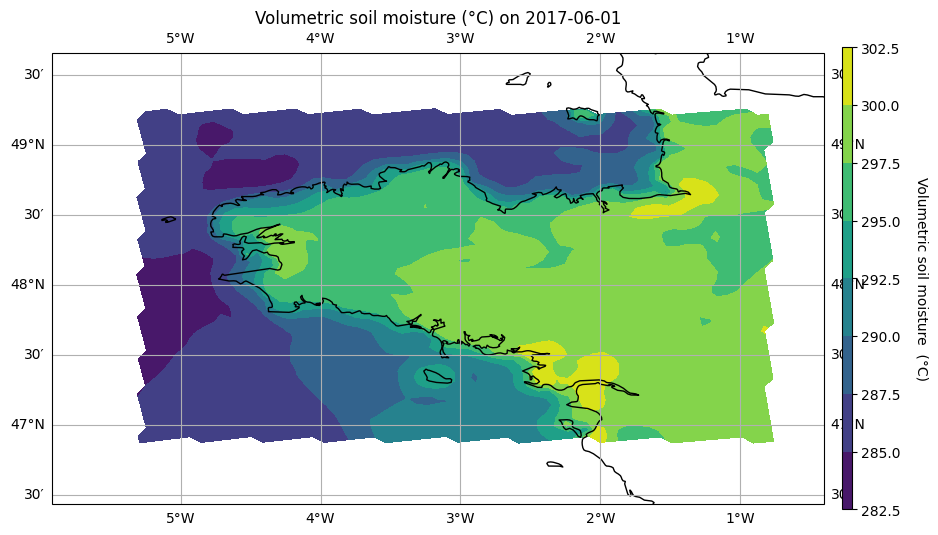

In [105]:
masked_selected_data = masked_ds_2m_temperature.sel(time='2017-06-01T12:00:00')['t2m']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Volumetric soil moisture (°C)')
cbar.set_label('Volumetric soil moisture  (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Volumetric soil moisture (°C) on 2017-06-01')

# Display the plot
plt.show()

In [121]:
# Preparing data for DataFrame
ds_selected_year = masked_ds_2m_temperature.sel(time=masked_ds_2m_temperature['time'].dt.year == 2017)

data = []
# Initialize dictionaries to hold the sum and count of TCIWV values for each latitude and longitude pair
t2m_sum_dict = {}
t2m_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and tciwv values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    t2m = selected_time['t2m'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            t2m_sum_dict.setdefault(lat_long_pair, 0)
            t2m_count_dict.setdefault(lat_long_pair, 0)
            t2m_sum_dict[lat_long_pair] += t2m[i, j]
            t2m_count_dict[lat_long_pair] += 1

# Calculate the average TCIWV for each latitude and longitude pair
avg_t2m = {key: t2m_sum_dict[key] / t2m_count_dict[key] for key in t2m_sum_dict.keys()}

# Preparing data for DataFrame
data = [[lat, lon, avg] for (lat, lon), avg in avg_t2m.items()]

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_t2m'])
df = df.dropna()
df.to_csv('t2m_processed.csv', index=False)

In [140]:
def get_t2m_averaged_values(lat, lon, df):
    # Combine the latitude and longitude into a single array of points
    points = df[['Latitude', 'Longitude']].values
    # Build a k-d tree for quick nearest-neighbor lookup
    tree = cKDTree(points)
    
    # Query the k-d tree to find the index of the closest point
    distance, index = tree.query([lat, lon])
    
    # Get the data for the closest point
    closest_point = df.iloc[index]
    # Calculate the averaged values
    avg_t2m = closest_point['Avg_t2m']
    
    return avg_t2m

In [124]:
for index, row in df_frh01.iterrows():
    new_lat = row['centroid_x']
    new_lon = row['centroid_y']
    avg_t2m = get_t2m_averaged_values(new_lat, new_lon, df)
    df_frh01.loc[index, 'avg_t2m'] = avg_t2m

In [125]:
df_frh01

centroid_x  centroid_y crop_type      area  avg_vsw_0  avg_vsw_1  \
0       48.038537   -2.641337  rapeseed   45999.0   0.232073   0.245261   
1       48.040079   -2.639061     wheat   38653.0   0.245963   0.257899   
2       48.098735   -2.557647     wheat  111772.0   0.237749   0.251092   
3       48.093464   -2.555500    barley   14144.0   0.237749   0.251092   
4       48.113062   -2.765586      corn   25206.0   0.245963   0.257899   
...           ...         ...       ...       ...        ...        ...   
93947   48.567755   -2.149713      corn   24609.0   0.236007   0.245714   
93948   48.568096   -2.154948      corn   30466.0   0.236007   0.245714   
93949   48.562131   -2.151864      corn    7793.0   0.236007   0.245714   
93950   48.429947   -1.979308  rapeseed   48885.0   0.227122   0.238214   
93951   48.431202   -1.979774  rapeseed   12994.0   0.227122   0.238214   

       avg_tciwv     avg_t2m  
0      18.308807  287.702895  
1      18.215645  287.702895  
2      18.229506  287.611207  
3      18.229506  287.611207  
4      18.215645  287.651626  
...          ...         ...  
93947  18.474969  287.767430  
93948  18.474969  287.875340  
93949  18.474969  287.767430  
93950  18.476398  288.240249  
93951  18.476398  288.240249  

[93952 rows x 8 columns]

In [102]:
ds_volumetric_wilting_point = open_dataset(r"C:\Users\user\Downloads\adaptor.mars.external-1704962922.4568803-26733-1-aab36616-2756-4a09-8912-5e409b3c5b5a.grib")


In [103]:
ds_volumetric_wilting_point

<xarray.Dataset>
Dimensions:     (time: 36, soilLayer: 14, y: 1069, x: 1069)
Coordinates:
  * time        (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-28T12:0...
    step        timedelta64[ns] ...
  * soilLayer   (soilLayer) float64 1.0 2.0 3.0 4.0 5.0 ... 11.0 12.0 13.0 14.0
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    vwiltm      (time, soilLayer, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-01-13T17:54 GRIB to CDM+CF via cfgrib-0.9.1...

In [106]:
first_10_longitudes = ds_volumetric_wilting_point['longitude'][0, :100]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-17.486      -17.44187394 -17.39772944 -17.35356652 -17.30938521
 -17.26518553 -17.22096749 -17.1767311  -17.1324764  -17.08820341
 -17.04391213 -16.99960259 -16.95527482 -16.91092883 -16.86656463
 -16.82218226 -16.77778173 -16.73336305 -16.68892626 -16.64447137
 -16.59999841 -16.55550738 -16.51099832 -16.46647124 -16.42192617
 -16.37736312 -16.33278211 -16.28818317 -16.24356632 -16.19893158
 -16.15427896 -16.1096085  -16.06492021 -16.02021411 -15.97549022
 -15.93074857 -15.88598918 -15.84121207 -15.79641725 -15.75160476
 -15.70677461 -15.66192682 -15.61706143 -15.57217844 -15.52727788
 -15.48235978 -15.43742415 -15.39247102 -15.3475004  -15.30251233
 -15.25750683 -15.21248391 -15.1674436  -15.12238592 -15.0773109
 -15.03221855 -14.98710891 -14.94198199 -14.89683781 -14.8516764
 -14.80649779 -14.76130199 -14.71608903 -14.67085893 -14.62561172
 -14.58034741 -14.53506604 -14.48976762 -14.44445218 -14.39911975
 -14.35377034 -14.30840398 -14.26302069 -14.217620

In [105]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_volumetric_wilting_point['longitude'] = convert_longitude(ds_volumetric_wilting_point['longitude'])

In [83]:
# ds_volumetric_wilting_point["latitude"] = np.flip(ds_volumetric_wilting_point["latitude"], axis=0)

In [84]:
ds_volumetric_wilting_point

<xarray.Dataset>
Dimensions:     (time: 36, soilLayer: 14, y: 1069, x: 1069)
Coordinates:
  * time        (time) datetime64[ns] 2017-01-01T12:00:00 ... 2017-12-28T12:0...
    step        timedelta64[ns] ...
  * soilLayer   (soilLayer) float64 1.0 2.0 3.0 4.0 5.0 ... 11.0 12.0 13.0 14.0
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 -17.49 -17.44 -17.4 -17.35 ... 73.97 74.04 74.1
    valid_time  (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    vwiltm      (time, soilLayer, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             lfpw
    GRIB_centreDescription:  French Weather Service - Toulouse
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             French Weather Service - Toulouse
    history:                 2024-01-13T17:10 GRIB to CDM+CF via cfgrib-0.9.1...

In [91]:
masked_ds_volumetric_wilting_point.latitude

<xarray.DataArray 'latitude' (y: 57, x: 68)>
array([[46.43280864, 46.44143785, 46.4500213 , ..., 46.89752156,
        46.90313033, 46.90869201],
       [46.48141238, 46.49005018, 46.49864216, ..., 46.94659005,
        46.95220447, 46.95777174],
       [46.53001711, 46.5386635 , 46.54726404, ..., 46.9956601 ,
        47.00128016, 47.00685304],
       ...,
       [49.05789997, 49.06700776, 49.07606734, ..., 49.54854214,
        49.55446583, 49.56033982],
       [49.10650329, 49.11562024, 49.12468894, ..., 49.59764229,
        49.60357202, 49.609452  ],
       [49.15510554, 49.16423166, 49.1733095 , ..., 49.64674201,
        49.65267778, 49.65856376]])
Coordinates:
    step       timedelta64[ns] 00:00:00
    latitude   (y, x) float64 46.43 46.44 46.45 46.46 ... 49.65 49.65 49.66
    longitude  (y, x) float64 -5.176 -5.106 -5.035 ... -1.036 -0.96 -0.8841
Dimensions without coordinates: y, x
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

In [107]:
ds_volumetric_wilting_point_flipped = ds_volumetric_wilting_point.assign_coords(latitude=np.flip(ds_volumetric_wilting_point["latitude"], axis = 0))


In [108]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = -5.314167  # replace with your desired minimum latitude
lon_max = -0.761667   # replace with your desired maximum latitude
lat_min = 46.8675  # replace with your desired minimum longitude
lat_max = 49.257778   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
masked_ds_volumetric_wilting_point = ds_volumetric_wilting_point_flipped.where(
    (ds_volumetric_wilting_point_flipped.latitude >= lat_min) & (ds_volumetric_wilting_point_flipped.latitude <= lat_max) &
    (ds_volumetric_wilting_point_flipped.longitude >= lon_min) & (ds_volumetric_wilting_point_flipped.longitude <= lon_max), drop=True)


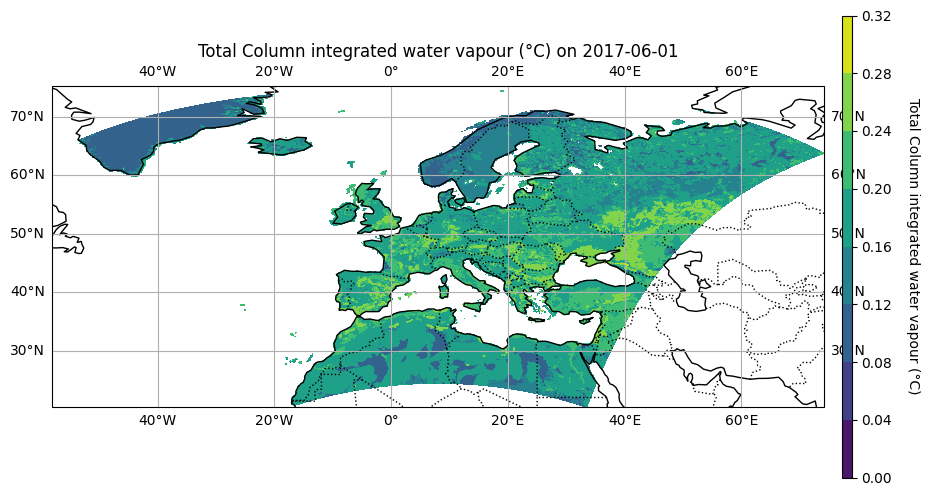

In [109]:
# masked_selected_data = ds_volumetric_wilting_point.sel(time='2017-06-01T12:00:00', soilLayer = 1)['vwiltm']
masked_selected_data = ds_volumetric_wilting_point_flipped.sel(time='2017-06-01T12:00:00', soilLayer=1)['vwiltm']

# masked_selected_data["latitude"] = np.flip(masked_selected_data["latitude"], axis=0)

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Total Column integrated water vapour (°C)')
cbar.set_label('Total Column integrated water vapour (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Total Column integrated water vapour (°C) on 2017-06-01')

# Display the plot
plt.show()

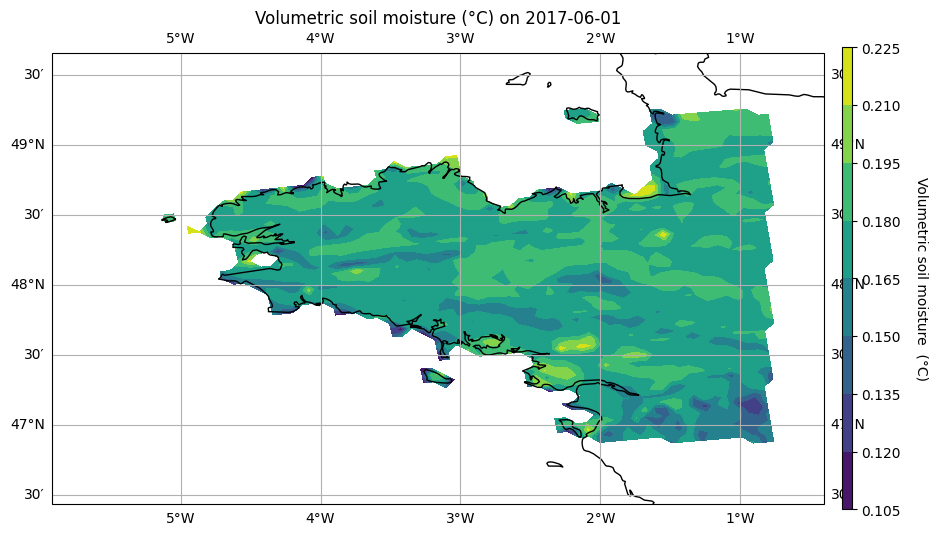

In [110]:
masked_selected_data = masked_ds_volumetric_wilting_point.sel(time='2017-06-14T12:00:00', soilLayer = 1)['vwiltm']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Volumetric soil moisture (°C)')
cbar.set_label('Volumetric soil moisture  (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Volumetric soil moisture (°C) on 2017-06-01')

# Display the plot
plt.show()

In [137]:
import pandas as pd

# Preparing data for DataFrame
ds_selected_year = masked_ds_volumetric_wilting_point.sel(time=masked_ds_volumetric_wilting_point['time'].dt.year == 2017)

data = []

# Initialize dictionaries to hold the sum and count of VSW values for each latitude and longitude pair for each soil layer
vwiltm_sum_dict = {}
vwiltm_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and VSW values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    vwiltm_values = selected_time['vwiltm'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            
            for soil_layer in range(vwiltm_values.shape[0]):
                vwiltm_sum_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vwiltm_count_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vwiltm_sum_dict[lat_long_pair][soil_layer] += vwiltm_values[soil_layer, i, j]
                vwiltm_count_dict[lat_long_pair][soil_layer] += 1

# Calculate the average VSW for each latitude and longitude pair for each soil layer
data = []

vwiltm_values = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

for lat_long_pair, layer_data in vwiltm_sum_dict.items():
    lat, lon = lat_long_pair
    for soil_layer in range(vwiltm_values.shape[0]):
        avg_vwiltm = layer_data.get(soil_layer, 0) / vwiltm_count_dict[lat_long_pair].get(soil_layer, 1)  # Avoid division by zero
        vwiltm_sum_dict[lat_long_pair][soil_layer] = avg_vwiltm
        vwiltm_count_dict[lat_long_pair][soil_layer] += 1

for lat_long_pair, layer_data in vwiltm_sum_dict.items():
    lat, lon = lat_long_pair
    data.append([lat, lon, vwiltm_sum_dict[lat_long_pair][0], vwiltm_sum_dict[lat_long_pair][1], vwiltm_sum_dict[lat_long_pair][2], vwiltm_sum_dict[lat_long_pair][3], vwiltm_sum_dict[lat_long_pair][4], vwiltm_sum_dict[lat_long_pair][5], vwiltm_sum_dict[lat_long_pair][6], vwiltm_sum_dict[lat_long_pair][7], vwiltm_sum_dict[lat_long_pair][8], vwiltm_sum_dict[lat_long_pair][9], vwiltm_sum_dict[lat_long_pair][10], vwiltm_sum_dict[lat_long_pair][11], vwiltm_sum_dict[lat_long_pair][12], vwiltm_sum_dict[lat_long_pair][13]])

print(data)

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_vwiltm_0', 'Avg_vwiltm_1','Avg_vwiltm_2', 'Avg_vwiltm_3', 'Avg_vwiltm_4', 'Avg_vwiltm_5', 'Avg_vwiltm_6', 'Avg_vwiltm_7', 'Avg_vwiltm_8', 'Avg_vwiltm_9', 'Avg_vwiltm_10', 'Avg_vwiltm_11', 'Avg_vwiltm_12', 'Avg_vwiltm_13'])
df = df.dropna()
df.to_csv('vwiltm_processed.csv', index=False)


[[49.15510553523601, -5.918641420629456, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.164231664862754, -5.844314552798778, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.173309499339275, -5.769960014456956, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.18233901119701, -5.695577937196731, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.19132017309939, -5.621168452925872, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.20025295784236, -5.546731693866377, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.20913733835437, -5.47226779255368, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.217973287696964, -5.397776881834716, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], [49.22676077906492, -5.32325909486724, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],

In [108]:
def get_vwiltm_averaged_values(lat, lon, df):
    # Combine the latitude and longitude into a single array of points
    points = df[['Latitude', 'Longitude']].values
    # Build a k-d tree for quick nearest-neighbor lookup
    tree = cKDTree(points)
    
    # Query the k-d tree to find the index of the closest point
    distance, index = tree.query([lat, lon])
    
    # Get the data for the closest point
    closest_point = df.iloc[index]
    # Calculate the averaged values
    avg_vwiltm_0 = closest_point['Avg_vwiltm_0']
    
    return avg_vwiltm_0

In [74]:
first_10_longitudes = ds['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

NameError: name 'ds' is not defined

In [8]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds['longitude'] = convert_longitude(ds['longitude'])


In [9]:
first_10_longitudes = ds['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-18.32       -18.2337158  -18.14736318 -18.06094227 -17.9744532
 -17.88789611 -17.80127115 -17.71457844 -17.62781813 -17.54099036]


In [23]:
print(ds.coords)

Coordinates:
  * time              (time) datetime64[ns] 2011-01-01T12:00:00 ... 2019-07-3...
    step              timedelta64[ns] ...
    entireAtmosphere  float64 ...
    latitude          (y, x) float64 ...
    longitude         (y, x) float64 -18.32 -18.23 -18.15 ... 76.14 76.27 76.4
    valid_time        (time) datetime64[ns] ...


In [66]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = -5.314167  # replace with your desired minimum latitude
lon_max = -0.761667   # replace with your desired maximum latitude
lat_min = 46.8675  # replace with your desired minimum longitude
lat_max = 49.257778   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
masked_ds = ds.where(
    (ds.latitude >= lat_min) & (ds.latitude <= lat_max) &
    (ds.longitude >= lon_min) & (ds.longitude <= lon_max), drop=True)


In [ ]:
masked_ds

In [68]:
masked_ds.latitude

<xarray.DataArray 'latitude' (y: 28, x: 34)>
array([[46.5193358 , 46.53601963, 46.55252439, 46.5688499 , 46.584996  ,
        46.60096251, 46.61674926, 46.6323561 , 46.64778286, 46.66302937,
        46.67809547, 46.69298101, 46.70768583, 46.72220978, 46.73655269,
        46.75071443, 46.76469483, 46.77849376, 46.79211107, 46.8055466 ,
        46.81880023, 46.83187181, 46.8447612 , 46.85746826, 46.86999286,
        46.88233487, 46.89449415, 46.90647058, 46.91826403, 46.92987437,
        46.94130148, 46.95254523, 46.96360552, 46.97448221],
       [46.6167914 , 46.63350665, 46.65004249, 46.66639876, 46.68257529,
        46.6985719 , 46.71438843, 46.73002472, 46.74548059, 46.76075588,
        46.77585044, 46.7907641 , 46.80549671, 46.82004811, 46.83441815,
        46.84860668, 46.86261354, 46.87643859, 46.89008167, 46.90354266,
        46.91682139, 46.92991774, 46.94283157, 46.95556272, 46.96811108,
        46.9804765 , 46.99265886, 47.00465803, 47.01647387, 47.02810626,
        47.03955508, 47.0508202 , 47.0619015 , 47.07279887],
       [46.71424563, 46.73099235, 46.74755934, 46.76394644, 46.78015346,
        46.79618024, 46.81202661, 46.8276924 , 46.84317745, 46.85848159,
        46.87360467, 46.88854651, 46.90330697, 46.91788589, 46.93228311,
        46.94649848, 46.96053185, 46.97438308, 46.988052  , 47.00153849,
        47.01484239, 47.02796357, 47.04090188, 47.05365718, 47.06622935,
        47.07861824, 47.09082372, 47.10284567, 47.11468395, 47.12633844,
...
        49.04017437, 49.05672526, 49.0730878 , 49.08926182, 49.10524714,
        49.12104357, 49.13665095, 49.1520691 , 49.16729785, 49.18233703,
        49.19718647, 49.21184601, 49.22631547, 49.24059471, 49.25468356,
        49.26858186, 49.28228946, 49.2958062 , 49.30913194, 49.32226651,
        49.33520978, 49.34796161, 49.36052183, 49.37289033, 49.38506695,
        49.39705155, 49.40884401, 49.42044419, 49.43185196],
       [49.05192929, 49.06945227, 49.0867875 , 49.10393479, 49.12089395,
        49.13766479, 49.15424713, 49.17064078, 49.18684556, 49.20286129,
        49.21868779, 49.23432489, 49.24977241, 49.26503017, 49.28009802,
        49.29497577, 49.30966327, 49.32416035, 49.33846684, 49.35258259,
        49.36650744, 49.38024123, 49.39378381, 49.40713502, 49.42029472,
        49.43326276, 49.44603898, 49.45862326, 49.47101544, 49.48321538,
        49.49522295, 49.50703801, 49.51866043, 49.53009008],
       [49.14924809, 49.16680431, 49.18417244, 49.20135229, 49.21834366,
        49.23514637, 49.25176023, 49.26818506, 49.28442067, 49.30046688,
        49.31632352, 49.3319904 , 49.34746735, 49.3627542 , 49.37785077,
        49.39275691, 49.40747243, 49.42199718, 49.436331  , 49.45047371,
        49.46442517, 49.47818521, 49.49175368, 49.50513043, 49.51831531,
        49.53130817, 49.54410886, 49.55671723, 49.56913315, 49.58135647,
        49.59338706, 49.60522478, 49.61686949, 49.62832106]])
Coordinates:
    step              timedelta64[ns] 00:00:00
    entireAtmosphere  float64 0.0
    latitude          (y, x) float64 46.52 46.54 46.55 ... 49.61 49.62 49.63
    longitude         (y, x) float64 -5.141 -4.999 -4.857 ... -1.025 -0.8732
Dimensions without coordinates: y, x
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy

In [54]:
masked_selected_data = masked_ds.sel(time='2017-06-01T12:00:00')
masked_selected_data.latitude

<xarray.DataArray 'latitude' (y: 15, x: 16)>
array([[46.97135785, 46.98632794, 47.00111631, 47.0157228 , 47.03014726,
        47.04438954, 47.05844948, 47.07232694, 47.08602176, 47.09953381,
        47.11286293, 47.12600898, 47.13897183, 47.15175134, 47.16434736,
        47.17675977],
       [47.06910968, 47.08410808, 47.09892442, 47.11355855, 47.12801031,
        47.14227955, 47.15636612, 47.17026987, 47.18399064, 47.1975283 ,
        47.21088269, 47.22405368, 47.23704113, 47.24984489, 47.26246482,
        47.2749008 ],
       [47.16685987, 47.18188663, 47.196731  , 47.21139283, 47.22587195,
        47.24016822, 47.25428147, 47.26821156, 47.28195835, 47.29552167,
        47.3089014 , 47.32209737, 47.33510947, 47.34793753, 47.36058143,
        47.37304103],
       [47.2646081 , 47.27966329, 47.29453576, 47.30922534, 47.32373188,
        47.33805522, 47.35219522, 47.36615172, 47.37992457, 47.39351362,
        47.40691873, 47.42013975, 47.43317655, 47.44602897, 47.45869689,
        47.47118016],
       [47.36235407, 47.37743775, 47.39233837, 47.40705577, 47.42158979,
        47.43594028, 47.45010708, 47.46409004, 47.47788901, 47.49150384,
        47.50493439, 47.51818051, 47.53124206, 47.5441189 , 47.55681089,
        47.56931789],
...
       [47.9487653 , 47.96402123, 47.97909207, 47.99397765, 48.00867782,
        48.02319241, 48.03752126, 48.05166423, 48.06562115, 48.07939188,
        48.09297626, 48.10637414, 48.11958539, 48.13260985, 48.14544739,
        48.15809785],
       [48.04648686, 48.06177172, 48.07687115, 48.09178498, 48.10651305,
        48.1210552 , 48.13541128, 48.14958112, 48.16356457, 48.17736148,
        48.1909717 , 48.20439508, 48.21763147, 48.23068072, 48.24354271,
        48.25621727],
       [48.14420369, 48.15951755, 48.17464563, 48.18958777, 48.20434381,
        48.21891359, 48.23329694, 48.24749372, 48.26150376, 48.27532691,
        48.28896302, 48.30241195, 48.31567354, 48.32874765, 48.34163413,
        48.35433285],
       [48.2419155 , 48.25725841, 48.27241521, 48.28738573, 48.30216979,
        48.31676726, 48.33117795, 48.34540172, 48.35943841, 48.37328786,
        48.38694993, 48.40042446, 48.41371131, 48.42681032, 48.43972137,
        48.45244429],
       [48.33962196, 48.35499399, 48.37017957, 48.38517852, 48.39999068,
        48.41461589, 48.42905399, 48.44330481, 48.45736821, 48.47124402,
        48.4849321 , 48.49843229, 48.51174446, 48.52486844, 48.53780409,
        48.55055128]])
Coordinates:
    time              datetime64[ns] 2017-06-01T12:00:00
    step              timedelta64[ns] 00:00:00
    entireAtmosphere  float64 0.0
    latitude          (y, x) float64 46.97 46.99 47.0 ... 48.52 48.54 48.55
    longitude         (y, x) float64 -3.786 -3.643 -3.499 ... -2.037 -1.889
    valid_time        datetime64[ns] ...
Dimensions without coordinates: y, x
Attributes:
    units:          degrees_north
    standard_name:  latitude
    long_name:      latitude

In [55]:
masked_selected_data.longitude

<xarray.DataArray 'longitude' (y: 15, x: 16)>
array([[-3.78610407, -3.64280745, -3.49942972, -3.35597182, -3.21243467,
        -3.0688192 , -2.92512634, -2.78135703, -2.63751221, -2.49359282,
        -2.34959981, -2.20553413, -2.06139672, -1.91718855, -1.77291057,
        -1.62856374],
       [-3.80821681, -3.66465964, -3.52102091, -3.37730157, -3.23350253,
        -3.08962474, -2.94566913, -2.80163664, -2.65752822, -2.51334481,
        -2.36908738, -2.22475686, -2.08035422, -1.93588041, -1.79133641,
        -1.64672317],
       [-3.83041202, -3.68659338, -3.54269273, -3.398711  , -3.25464915,
        -3.11050809, -2.96628879, -2.82199218, -2.67761921, -2.53317084,
        -2.38864802, -2.24405171, -2.09938288, -1.95464248, -1.80983149,
        -1.66495087],
       [-3.85269017, -3.70860912, -3.56444561, -3.42020058, -3.27587496,
        -3.1314697 , -2.98698576, -2.84242408, -2.69778561, -2.55307131,
        -2.40828215, -2.26341909, -2.1184831 , -1.97347514, -1.82839619,
        -1.68324722],
       [-3.87505172, -3.73070733, -3.58628002, -3.44177073, -3.29718041,
        -3.15251   , -3.00776047, -2.86293276, -2.71802783, -2.57304665,
        -2.42799019, -2.28285941, -2.13765528, -1.99237879, -1.8470309 ,
        -1.70161261],
...
       [-4.01099865, -3.86505433, -3.71902426, -3.57290939, -3.42671072,
        -3.28042922, -3.13406588, -2.98762167, -2.8410976 , -2.69449466,
        -2.54781384, -2.40105614, -2.25422257, -2.10731414, -1.96033185,
        -1.81327672],
       [-4.03395721, -3.88774287, -3.74144229, -3.59505644, -3.44858631,
        -3.30203288, -3.15539714, -3.00868009, -2.86188271, -2.71500601,
        -2.56805099, -2.42101866, -2.27391003, -2.1267261 , -1.97946789,
        -1.83213643],
       [-4.05700298, -3.91051765, -3.76394559, -3.61728778, -3.4705452 ,
        -3.32371885, -3.17680973, -3.02981883, -2.88274714, -2.73559569,
        -2.58836547, -2.44105749, -2.29367277, -2.14621234, -1.9986772 ,
        -1.85106838],
       [-4.08013647, -3.93337917, -3.78653464, -3.63960387, -3.49258786,
        -3.3454876 , -3.1983041 , -3.05103834, -2.90369135, -2.75626413,
        -2.6087577 , -2.46117306, -2.31351125, -2.16577328, -2.01796018,
        -1.87007298],
       [-4.10335817, -3.95632791, -3.80920992, -3.66200521, -3.51471477,
        -3.3673396 , -3.21988071, -3.0723391 , -2.92471579, -2.77701179,
        -2.62922812, -2.48136581, -2.33342587, -2.18540934, -2.03731726,
        -1.88915065]])
Coordinates:
    time              datetime64[ns] 2017-06-01T12:00:00
    step              timedelta64[ns] 00:00:00
    entireAtmosphere  float64 0.0
    latitude          (y, x) float64 46.97 46.99 47.0 ... 48.52 48.54 48.55
    longitude         (y, x) float64 -3.786 -3.643 -3.499 ... -2.037 -1.889
    valid_time        datetime64[ns] ...
Dimensions without coordinates: y, x

In [57]:
masked_selected_data.tciwv

<xarray.DataArray 'tciwv' (y: 15, x: 16)>
array([[      nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan, 18.90892 , 18.50267 , 19.237045, 21.53392 ,
        24.19017 , 26.12767 ,       nan,       nan],
       [      nan, 16.90892 , 17.40892 , 17.955795, 18.393295, 18.737045,
        19.03392 , 19.143295, 18.78392 , 18.330795, 19.049545, 20.97142 ,
        22.97142 , 24.330795, 25.22142 ,       nan],
       [16.84642 , 17.12767 , 17.62767 , 18.112045, 18.455795, 18.72142 ,
        18.94017 , 18.94017 , 18.53392 , 18.37767 , 19.393295, 21.06517 ,
        22.424545, 23.06517 , 23.59642 ,       nan],
       [17.06517 , 17.34642 , 17.799545, 18.19017 , 18.424545, 18.56517 ,
        18.69017 , 18.56517 , 18.268295, 18.705795, 20.080795, 21.612045,
        22.50267 , 22.580795, 22.737045,       nan],
       [17.25267 , 17.50267 , 17.87767 , 18.15892 , 18.299545, 18.330795,
        18.31517 , 18.12767 , 18.143295, 19.112045, 20.643295, 22.080795,
        22.737045, 22.487045, 22.268295,       nan],
       [17.44017 , 17.612045, 17.862045, 17.97142 , 18.00267 , 18.00267 ,
        18.00267 , 17.84642 , 18.15892 , 19.44017 , 21.049545, 22.362045,
        22.737045, 22.268295, 21.97142 ,       nan],
       [17.59642 , 17.705795, 17.830795, 17.830795, 17.862045, 17.924545,
        17.94017 , 17.87767 , 18.31517 , 19.65892 , 21.330795, 22.47142 ,
...
        18.737045, 18.94017 , 19.37767 , 20.205795, 21.362045, 22.174545,
        22.237045, 21.924545, 21.72142 ,       nan],
       [      nan, 18.15892 , 18.40892 , 18.518295, 18.643295, 18.830795,
        19.22142 , 19.53392 , 19.84642 , 20.330795, 21.143295, 21.97142 ,
        22.330795, 22.25267 , 21.97142 , 21.97142 ],
       [      nan, 18.44017 , 18.59642 , 18.643295, 18.72142 , 18.94017 ,
        19.34642 , 19.69017 , 19.862045, 20.049545, 20.674545, 21.72142 ,
        22.549545, 22.674545, 22.22142 , 21.862045],
       [      nan, 18.94017 , 18.94017 , 18.94017 , 18.87767 , 18.94017 ,
        19.19017 , 19.393295, 19.40892 , 19.47142 , 20.09642 , 21.34642 ,
        22.56517 , 22.84642 , 22.40892 , 21.87767 ],
       [      nan, 19.705795, 19.518295, 19.487045, 19.268295, 19.112045,
        19.00267 , 18.862045, 18.78392 , 19.03392 , 19.87767 , 21.25267 ,
        22.518295, 22.87767 , 22.62767 , 22.19017 ],
       [      nan, 20.19017 , 19.87767 , 19.81517 , 19.59642 , 19.205795,
        18.90892 , 18.705795, 18.768295, 19.28392 , 20.268295, 21.487045,
              nan,       nan,       nan,       nan],
       [      nan, 20.362045, 20.018295, 19.87767 , 19.674545,       nan,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan]], dtype=float32)
Coordinates:
    time              datetime64[ns] 2017-06-01T12:00:00
    step              timedelta64[ns] 00:00:00
    entireAtmosphere  float64 0.0
    latitude          (y, x) float64 46.97 46.99 47.0 ... 48.52 48.54 48.55
    longitude         (y, x) float64 -3.786 -3.643 -3.499 ... -2.037 -1.889
    valid_time        datetime64[ns] ...
Dimensions without coordinates: y, x
Attributes: (12/33)
    GRIB_paramId:                             260057
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      319225
    GRIB_typeOfLevel:                         entireAtmosphere
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Total column integrated water v...
    GRIB_shortName:                           tciwv
    GRIB_units:                               kg m**-2
    long_name:                                Total column integrated water v...
    units:                                    kg m**-2
    standard_name:                            lwe_thickness_of_atmosphere_mas...

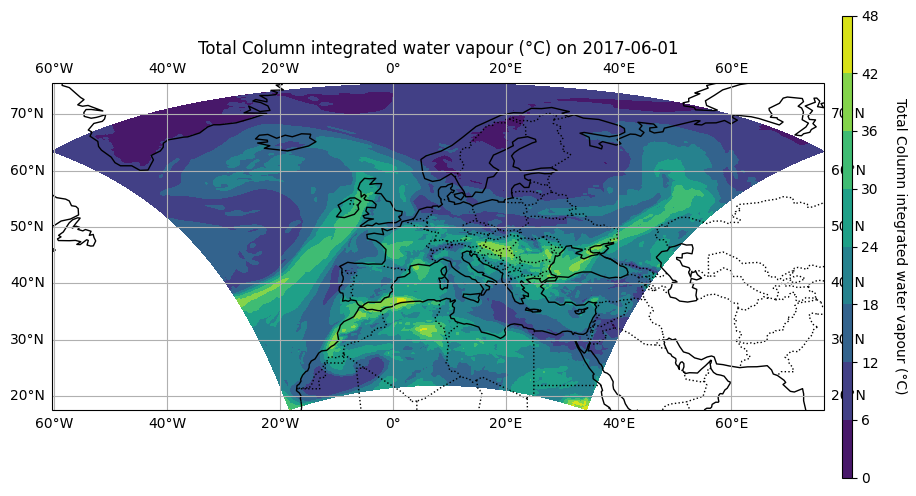

In [39]:
masked_selected_data = ds.sel(time='2017-06-01T12:00:00')['tciwv']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Total Column integrated water vapour (°C)')
cbar.set_label('Total Column integrated water vapour (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Total Column integrated water vapour (°C) on 2017-06-01')

# Display the plot
plt.show()

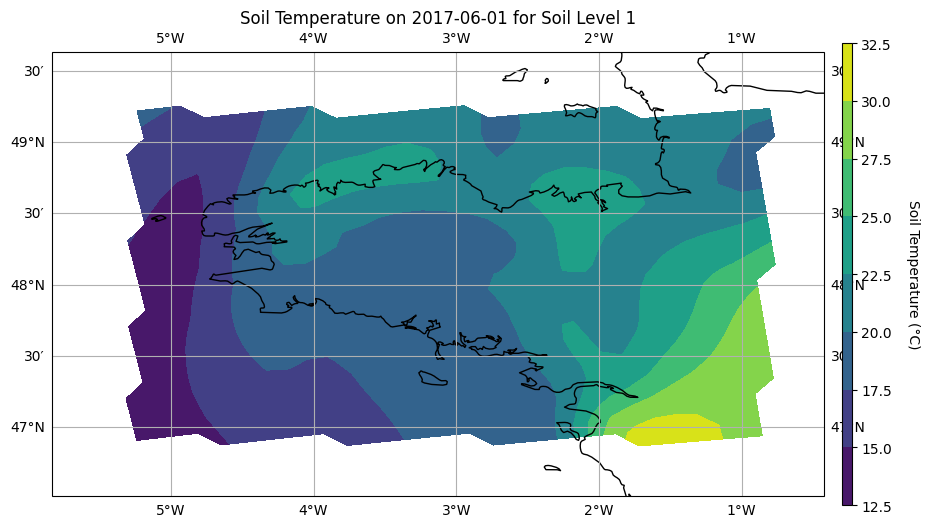

In [69]:
masked_selected_data = masked_ds.sel(time='2017-06-01T12:00:00')['tciwv']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Soil Temperature (°C)')
cbar.set_label('Soil Temperature (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Soil Temperature on 2017-06-01 for Soil Level 1')

# Display the plot
plt.show()

In [ ]:
!pip install pandas

In [70]:
# Preparing data for DataFrame
ds_selected_year = masked_ds.sel(time=ds['time'].dt.year == 2017)

data = []
# Initialize dictionaries to hold the sum and count of TCIWV values for each latitude and longitude pair
tciwv_sum_dict = {}
tciwv_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and tciwv values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    tciwv = selected_time['tciwv'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            tciwv_sum_dict.setdefault(lat_long_pair, 0)
            tciwv_count_dict.setdefault(lat_long_pair, 0)
            tciwv_sum_dict[lat_long_pair] += tciwv[i, j]
            tciwv_count_dict[lat_long_pair] += 1

# Calculate the average TCIWV for each latitude and longitude pair
avg_tciwv = {key: tciwv_sum_dict[key] / tciwv_count_dict[key] for key in tciwv_sum_dict.keys()}

# Preparing data for DataFrame
data = [[lat, lon, avg] for (lat, lon), avg in avg_tciwv.items()]

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_TCIWV_2017'])
df = df.dropna()
df.to_csv('TCIWV_processed.csv', index=False)

In [63]:
ds_selected_year = masked_ds.sel(time=ds['time'].dt.year == 2017)


In [114]:
ds_vl_soil_moisture = open_dataset(r"C:\Users\user\Documents\an3\Licenta\adaptor.mars.external-1704388875.0963736-31582-15-66ec8e97-427f-4435-9323-2367638322d9.grib")


In [ ]:
ds_vl_soil_moisture

In [118]:
first_10_longitudes = ds_vl_soil_moisture['longitude'][0, :10]

# Print the first 10 longitude values
print("First 10 Longitude Values:\n")
print(first_10_longitudes.values)

First 10 Longitude Values:

[-18.32       -18.2337158  -18.14736318 -18.06094227 -17.9744532
 -17.88789611 -17.80127115 -17.71457844 -17.62781813 -17.54099036]


In [9]:
print(ds_vl_soil_moisture['longitude'])

<xarray.DataArray 'longitude' (y: 565, x: 565)>
array([[341.68    , 341.766284, 341.852637, ...,  34.147818,  34.23417 ,
         34.320454],
       [341.649322, 341.735691, 341.822128, ...,  34.178327,  34.264764,
         34.351133],
       [341.618575, 341.705029, 341.791551, ...,  34.208905,  34.295427,
         34.38188 ],
       ...,
       [299.923575, 300.057967, 300.192928, ...,  75.807784,  75.942743,
         76.077131],
       [299.760081, 299.894359, 300.02921 , ...,  75.971502,  76.106349,
         76.240625],
       [299.596017, 299.73018 , 299.864917, ...,  76.135795,  76.270528,
         76.404688]])
Coordinates:
    step       timedelta64[ns] ...
    latitude   (y, x) float64 17.61 17.64 17.67 17.7 ... 63.62 63.55 63.48 63.4
    longitude  (y, x) float64 341.7 341.8 341.9 341.9 ... 76.0 76.14 76.27 76.4
Dimensions without coordinates: y, x
Attributes:
    units:          degrees_east
    standard_name:  longitude
    long_name:      longitude


In [117]:
def convert_longitude(lon):
    return ((lon + 180) % 360) - 180

# Apply this function to your longitude coordinate values
ds_vl_soil_moisture['longitude'] = convert_longitude(ds_vl_soil_moisture['longitude'])


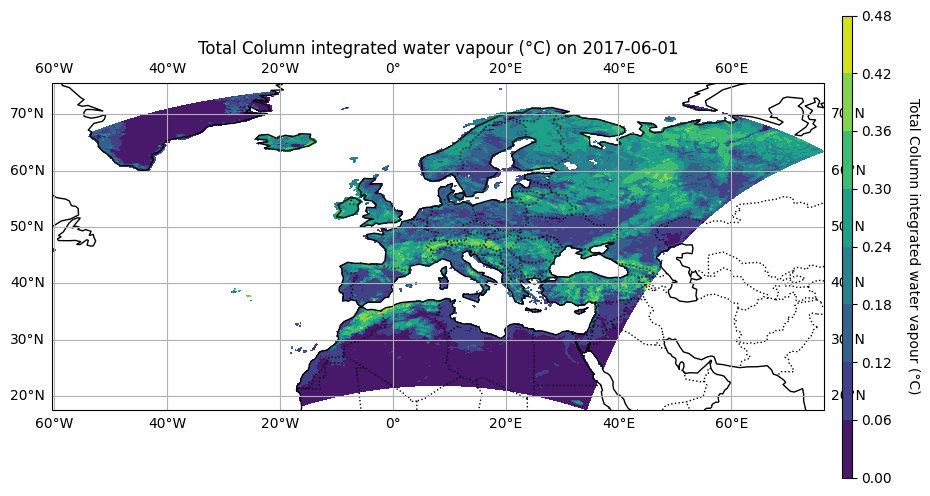

In [119]:
masked_selected_data = ds_vl_soil_moisture.sel(time='2017-06-01T12:00:00', soilLayer = 1)['vsw']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Total Column integrated water vapour (°C)')
cbar.set_label('Total Column integrated water vapour (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Total Column integrated water vapour (°C) on 2017-06-01')

# Display the plot
plt.show()

In [120]:
# Suppose you want to select a range of latitudes between lat_min and lat_max
# and a range of longitudes between lon_min and lon_max

lon_min = -5.314167  # replace with your desired minimum latitude
lon_max = -0.761667   # replace with your desired maximum latitude
lat_min = 46.8675  # replace with your desired minimum longitude
lat_max = 49.257778   # replace with your desired maximum longitude

# Select the desired range of latitudes and longitudes
masked_ds_vl_soil_moisture = ds_vl_soil_moisture.where(
    (ds_vl_soil_moisture.latitude >= lat_min) & (ds_vl_soil_moisture.latitude <= lat_max) &
    (ds_vl_soil_moisture.longitude >= lon_min) & (ds_vl_soil_moisture.longitude <= lon_max), drop=True)


In [ ]:
masked_ds_vl_soil_moisture

In [ ]:
masked_selected_data = ds_vl_soil_moisture.sel(time='2017-06-01T12:00:00', soilLayer = 1)
masked_selected_data

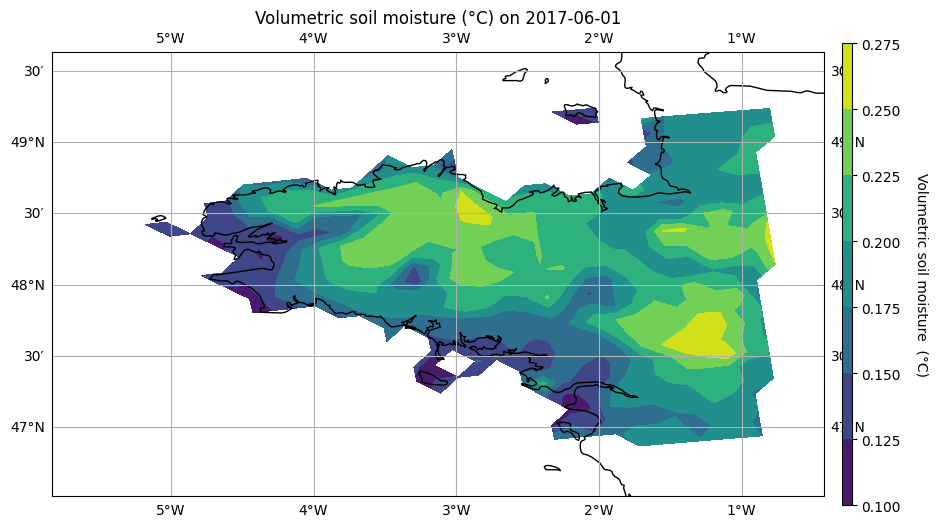

In [123]:
masked_selected_data = masked_ds_vl_soil_moisture.sel(time='2017-06-01T12:00:00', soilLayer = 2)['vsw']

# Define the Cartopy CRS (Coordinate Reference System)
projection = ccrs.PlateCarree()

# Create a figure with an axes object on which we will plot our data
fig, ax = plt.subplots(figsize=(12, 6), subplot_kw={'projection': projection})

# Add map features
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Set extent to focus on the region of interest
#ax.set_extent([-4, -1, 47.2, 48.2], crs=projection)

# Plot the data
contourf = ax.contourf(masked_selected_data.longitude, masked_selected_data.latitude, masked_selected_data,
                       transform=projection, cmap='viridis')

# Add a colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.02, aspect=50, label='Volumetric soil moisture (°C)')
cbar.set_label('Volumetric soil moisture  (°C)', rotation=270, labelpad=20)

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# Set the title
plt.title('Volumetric soil moisture (°C) on 2017-06-01')

# Display the plot
plt.show()

In [124]:
import pandas as pd

# Preparing data for DataFrame
ds_selected_year = masked_ds_vl_soil_moisture.sel(time=masked_ds_vl_soil_moisture['time'].dt.year == 2017)

data = []

# Initialize dictionaries to hold the sum and count of VSW values for each latitude and longitude pair for each soil layer
vsw_sum_dict = {}
vsw_count_dict = {}

# Loop through each time point in the selected year
for time_point in ds_selected_year.time:
    # Select data for the current time point
    selected_time = ds_selected_year.sel(time=time_point)

    # Extract latitude, longitude, and VSW values
    latitude = selected_time['latitude'].values
    longitude = selected_time['longitude'].values
    vsw_values = selected_time['vsw'].values

    for i in range(latitude.shape[0]):
        for j in range(longitude.shape[1]):
            lat_long_pair = (latitude[i, j], longitude[i, j])
            
            for soil_layer in range(vsw_values.shape[0]):
                vsw_sum_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vsw_count_dict.setdefault(lat_long_pair, {}).setdefault(soil_layer, 0)
                vsw_sum_dict[lat_long_pair][soil_layer] += vsw_values[soil_layer, i, j]
                vsw_count_dict[lat_long_pair][soil_layer] += 1

# Calculate the average VSW for each latitude and longitude pair for each soil layer
avg_vsw = {}

for lat_long_pair, layer_data in vsw_sum_dict.items():
    lat, lon = lat_long_pair
    avg_vsw_0 = layer_data.get(0, 0) / vsw_count_dict[lat_long_pair].get(0, 1)  # Avoid division by zero
    avg_vsw_1 = layer_data.get(1, 0) / vsw_count_dict[lat_long_pair].get(1, 1)  # Avoid division by zero
    
    data.append([lat, lon, avg_vsw_0, avg_vsw_1])

df = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Avg_VSW_0', 'Avg_VSW_1'])
df = df.dropna()
df.to_csv('VSW_processed.csv', index=False)


In [106]:
from scipy.spatial import cKDTree


In [104]:
def get_vsw_averaged_values(lat, lon, df):
    # Combine the latitude and longitude into a single array of points
    points = df[['Latitude', 'Longitude']].values
    # Build a k-d tree for quick nearest-neighbor lookup
    tree = cKDTree(points)
    
    # Query the k-d tree to find the index of the closest point
    distance, index = tree.query([lat, lon])
    
    # Get the data for the closest point
    closest_point = df.iloc[index]
    # Calculate the averaged values
    avg_vsw_0 = closest_point['Avg_VSW_0']
    avg_vsw_1 = closest_point['Avg_VSW_1']
    
    return avg_vsw_0, avg_vsw_1

In [48]:
example_lat = 46.92
example_lon = -1.30
avg_vsw_0, avg_vsw_1 = get_averaged_values(example_lat, example_lon, df)
print(avg_vsw_0)
print(avg_vsw_1)

0.17908748631578916
0.18878967677081762


In [130]:
df_frh01 = pd.read_csv('frh01_processed1.csv')



In [54]:
new_averaged_values = []
for index, row in df_frh01.iterrows():
    new_lat = row['centroid_x']
    new_lon = row['centroid_y']
    avg_vsw_0, avg_vsw_1 = get_averaged_values(new_lat, new_lon, df)
    df_frh01.loc[index, 'avg_vsw_0'] = avg_vsw_0
    df_frh01.loc[index, 'avg_vsw_1'] = avg_vsw_1




In [131]:
df_frh01

Unnamed: 0  centroid_x  centroid_y crop_type      area  avg_vsw_0  \
0               0   48.038537   -2.641337  rapeseed   45999.0   0.232073   
1               1   48.040079   -2.639061     wheat   38653.0   0.245963   
2               2   48.098735   -2.557647     wheat  111772.0   0.237749   
3               3   48.093464   -2.555500    barley   14144.0   0.237749   
4               4   48.113062   -2.765586      corn   25206.0   0.245963   
...           ...         ...         ...       ...       ...        ...   
93947       93947   48.567755   -2.149713      corn   24609.0   0.236007   
93948       93948   48.568096   -2.154948      corn   30466.0   0.236007   
93949       93949   48.562131   -2.151864      corn    7793.0   0.236007   
93950       93950   48.429947   -1.979308  rapeseed   48885.0   0.227122   
93951       93951   48.431202   -1.979774  rapeseed   12994.0   0.227122   

       avg_vsw_1  avg_tciwv     avg_t2m  
0       0.245261  18.308807  287.702895  
1       0.257899  18.215645  287.702895  
2       0.251092  18.229506  287.611207  
3       0.251092  18.229506  287.611207  
4       0.257899  18.215645  287.651626  
...          ...        ...         ...  
93947   0.245714  18.474969  287.767430  
93948   0.245714  18.474969  287.875340  
93949   0.245714  18.474969  287.767430  
93950   0.238214  18.476398  288.240249  
93951   0.238214  18.476398  288.240249  

[93952 rows x 9 columns]

In [143]:
df_frh01.to_csv('frh01_processed1.csv')

In [103]:
def get_tciwv_averaged_values(lat, lon, df):
    # Combine the latitude and longitude into a single array of points
    points = df[['Latitude', 'Longitude']].values
    # Build a k-d tree for quick nearest-neighbor lookup
    tree = cKDTree(points)
    
    # Query the k-d tree to find the index of the closest point
    distance, index = tree.query([lat, lon])
    
    # Get the data for the closest point
    closest_point = df.iloc[index]
    # Calculate the averaged values
    avg_tciwv = closest_point['Avg_TCIWV_2017']
    
    return avg_tciwv

In [126]:
df_vwiltm = pd.read_csv('vwiltm_processed.csv')

In [127]:
df_vwiltm

Latitude  Longitude  Avg_vwiltm_0  Avg_vwiltm_1  Avg_vwiltm_2  \
0     49.244290  -2.259544      0.174175      0.174175      0.174175   
1     49.251028  -2.184489      0.174175      0.174175      0.174175   
2     49.257717  -2.109413      0.177624      0.177624      0.177624   
3     49.195298  -2.249196      0.174175      0.174175      0.174175   
4     49.202029  -2.174214      0.179765      0.179765      0.179765   
...         ...        ...           ...           ...           ...   
1664  46.923661  -0.843609      0.146775      0.146775      0.146775   
1665  46.929464  -0.771788      0.157547      0.157547      0.157547   
1666  46.868772  -0.906823      0.168132      0.168132      0.168132   
1667  46.874616  -0.835086      0.145652      0.145652      0.145652   
1668  46.880413  -0.763333      0.154515      0.154515      0.154515   

      Avg_vwiltm_3  Avg_vwiltm_4  Avg_vwiltm_5  Avg_vwiltm_6  Avg_vwiltm_7  \
0         0.174175      0.174175      0.174175      0.174175      0.174175   
1         0.174175      0.174175      0.174175      0.174175      0.174175   
2         0.177624      0.177624      0.177624      0.177624      0.177624   
3         0.174175      0.174175      0.174175      0.174175      0.174175   
4         0.179765      0.179765      0.179765      0.179765      0.179765   
...            ...           ...           ...           ...           ...   
1664      0.146775      0.146775      0.146775      0.146775      0.146775   
1665      0.157547      0.157547      0.157547      0.157547      0.157547   
1666      0.168132      0.168132      0.168132      0.168132      0.168132   
1667      0.145652      0.145652      0.145652      0.145652      0.145652   
1668      0.154515      0.154515      0.154515      0.154515      0.154515   

      Avg_vwiltm_8  Avg_vwiltm_9  Avg_vwiltm_10  Avg_vwiltm_11  Avg_vwiltm_12  \
0         0.174175      0.174175       0.174175       0.174175       0.174175   
1         0.174175      0.174175       0.174175       0.174175       0.174175   
2         0.177624      0.177624       0.177624       0.177624       0.177624   
3         0.174175      0.174175       0.174175       0.174175       0.174175   
4         0.179765      0.179765       0.179765       0.179765       0.179765   
...            ...           ...            ...            ...            ...   
1664      0.146775      0.146775       0.146775       0.146775       0.146775   
1665      0.157547      0.157547       0.157547       0.157547       0.157547   
1666      0.168132      0.168132       0.168132       0.168132       0.168132   
1667      0.145652      0.145652       0.145652       0.145652       0.145652   
1668      0.154515      0.154515       0.154515       0.154515       0.154515   

      Avg_vwiltm_13  
0          0.174175  
1          0.174175  
2          0.177624  
3          0.174175  
4          0.179765  
...             ...  
1664       0.146775  
1665       0.157547  
1666       0.168132  
1667       0.145652  
1668       0.154515  

[1669 rows x 16 columns]

In [143]:
df_tciwv = pd.read_csv('TCIWV_processed.csv')

In [144]:
df_vsw = pd.read_csv('VSW_processed.csv')

In [145]:
df_t2m = pd.read_csv('t2m_processed.csv')

In [131]:
df_t2m

Latitude  Longitude     Avg_t2m
0     46.868772  -0.906823  288.231541
1     46.874616  -0.835086  288.251154
2     46.880413  -0.763333  288.386896
3     46.869320  -1.489246  289.047215
4     46.875546  -1.417577  289.031834
...         ...        ...         ...
2973  49.246570  -4.713337  285.633125
2974  49.254911  -4.638656  285.631118
2975  49.235500  -5.248715  285.655315
2976  49.244190  -5.174143  285.642837
2977  49.252832  -5.099546  285.648506

[2978 rows x 3 columns]

In [128]:
df_vsw

Latitude  Longitude  Avg_VSW_0  Avg_VSW_1
0    46.869993  -1.718045   0.177072   0.184999
1    46.882335  -1.574491   0.176815   0.184573
2    46.894494  -1.430871   0.177618   0.186579
3    46.906471  -1.287185   0.179087   0.188790
4    46.918264  -1.143434   0.180440   0.188226
..         ...        ...        ...        ...
440  49.223991  -0.954049   0.224526   0.234835
441  49.235356  -0.803606   0.224513   0.238671
442  49.211121  -2.325002   0.169532   0.171998
443  49.224231  -2.174928   0.183315   0.185638
444  49.237150  -2.024776   0.194524   0.200298

[445 rows x 4 columns]

In [61]:
df_tciwv

Latitude  Longitude  Avg_TCIWV_2017
0    46.869993  -1.718045       18.561117
1    46.882335  -1.574491       18.545030
2    46.894494  -1.430871       18.540410
3    46.906471  -1.287185       18.510084
4    46.918264  -1.143434       18.336529
..         ...        ...             ...
739  49.234325  -4.166875       18.802884
740  49.249772  -4.017250       18.736184
741  49.218344  -5.237421       18.908185
742  49.235146  -5.088185       18.950818
743  49.251760  -4.938850       18.972827

[744 rows x 3 columns]

In [64]:
example_lat = 46.92
example_lon = -1.30
avg_ticw = get_tciwv_averaged_values(example_lat, example_lon, df_tciwv)
avg_ticw

18.51008370358457

In [65]:
for index, row in df_frh01.iterrows():
    new_lat = row['centroid_x']
    new_lon = row['centroid_y']
    avg_ticw = get_tciwv_averaged_values(new_lat, new_lon, df_tciwv)
    df_frh01.loc[index, 'avg_tciwv'] = avg_ticw

In [66]:
df_frh01

centroid_x  centroid_y crop_type      area  avg_vsw_0  avg_vsw_1  \
0       48.038537   -2.641337  rapeseed   45999.0   0.232073   0.245261   
1       48.040079   -2.639061     wheat   38653.0   0.245963   0.257899   
2       48.098735   -2.557647     wheat  111772.0   0.237749   0.251092   
3       48.093464   -2.555500    barley   14144.0   0.237749   0.251092   
4       48.113062   -2.765586      corn   25206.0   0.245963   0.257899   
...           ...         ...       ...       ...        ...        ...   
93947   48.567755   -2.149713      corn   24609.0   0.236007   0.245714   
93948   48.568096   -2.154948      corn   30466.0   0.236007   0.245714   
93949   48.562131   -2.151864      corn    7793.0   0.236007   0.245714   
93950   48.429947   -1.979308  rapeseed   48885.0   0.227122   0.238214   
93951   48.431202   -1.979774  rapeseed   12994.0   0.227122   0.238214   

       avg_tciwv  
0      18.308807  
1      18.215645  
2      18.229506  
3      18.229506  
4      18.215645  
...          ...  
93947  18.474969  
93948  18.474969  
93949  18.474969  
93950  18.476398  
93951  18.476398  

[93952 rows x 7 columns]

In [144]:
df_frh02 = pd.read_csv('frh02_processed1.csv')


In [145]:
df_frh02

Unnamed: 0  centroid_x  centroid_y crop_type      area  avg_vsw_0  \
0               0   47.869573   -4.022340      corn    7250.0   0.171611   
1               1   47.870935   -4.032410      corn    4223.0   0.171611   
2               2   47.870564   -4.031890      corn   24347.0   0.171611   
3               3   47.867646   -4.036580      corn   28904.0   0.171611   
4               4   48.033270   -3.693682      corn   24817.0   0.217031   
...           ...         ...         ...       ...       ...        ...   
65046       65046   47.977535   -4.211542      corn  130716.0   0.210479   
65047       65047   47.931104   -4.324035      corn    6713.0   0.188185   
65048       65048   48.299694   -3.583349      corn   27956.0   0.216020   
65049       65049   48.302688   -3.702759     wheat   24811.0   0.216020   
65050       65050   48.303081   -3.698863     wheat   30165.0   0.216020   

       avg_vsw_1  avg_tciwv     avg_t2m  
0       0.177711  18.974003  288.063735  
1       0.177711  18.974003  288.178725  
2       0.177711  18.974003  288.178725  
3       0.177711  18.974003  288.178725  
4       0.217060  18.440359  287.513469  
...          ...        ...         ...  
65046   0.207519  18.761638  288.075400  
65047   0.186660  18.877901  288.207046  
65048   0.217642  18.466023  287.349271  
65049   0.217642  18.466023  287.434422  
65050   0.217642  18.466023  287.434422  

[65051 rows x 9 columns]

In [154]:
 for index, row in df_frh02.iterrows():
    new_lat = row['centroid_x']
    new_lon = row['centroid_y']
    avg_t2m = get_t2m_averaged_values(new_lat, new_lon, df_t2m)
    avg_ticw = get_tciwv_averaged_values(new_lat, new_lon, df_tciwv)
    avg_vsw_0, avg_vsw_1 = get_vsw_averaged_values(new_lat, new_lon, df_vsw)
    df_frh02.loc[index, 'avg_vsw_0'] = avg_vsw_0
    df_frh02.loc[index, 'avg_vsw_1'] = avg_vsw_1
    df_frh02.loc[index, 'avg_tciwv'] = avg_ticw
    df_frh02.loc[index, 'avg_t2m'] = avg_t2m

In [148]:
df_frh02.to_csv('frh02_processed1.csv')

In [149]:
df_frh03 = pd.read_csv('frh03_processed1.csv')


In [150]:
df_frh03

Unnamed: 0  centroid_x  centroid_y crop_type      area  avg_vsw_0  \
0               0   47.834322   -1.218643     wheat    9326.0   0.227118   
1               1   48.584172   -1.559981     wheat   81172.0   0.220542   
2               2   48.584168   -1.556642     wheat   70139.0   0.220542   
3               3   48.584187   -1.558203      corn   54128.0   0.220542   
4               4   48.584565   -1.564954      corn   44153.0   0.220542   
...           ...         ...         ...       ...       ...        ...   
81124       81124   47.711511   -1.812929     wheat  168052.0   0.218253   
81125       81125   47.716056   -1.700213      corn   58499.0   0.223276   
81126       81126   47.716467   -1.691792      corn  104253.0   0.223276   
81127       81127   47.716725   -1.685966      corn   18448.0   0.223276   
81128       81128   47.712883   -1.696886     wheat   73599.0   0.223276   

       avg_vsw_1  avg_tciwv     avg_t2m  
0       0.242066  18.345181  288.057170  
1       0.231316  18.474675  287.937487  
2       0.231316  18.474675  287.831503  
3       0.231316  18.474675  287.937487  
4       0.231316  18.474675  287.937487  
...          ...        ...         ...  
81124   0.231114  18.719971  288.768786  
81125   0.237055  18.681833  288.930651  
81126   0.237055  18.681833  288.930651  
81127   0.237055  18.681833  288.930651  
81128   0.237055  18.681833  288.930651  

[81129 rows x 9 columns]

In [167]:
 for index, row in df_frh03.iterrows():
    new_lat = row['centroid_x']
    new_lon = row['centroid_y']
    avg_t2m = get_t2m_averaged_values(new_lat, new_lon, df_t2m)
    avg_ticw = get_tciwv_averaged_values(new_lat, new_lon, df_tciwv)
    avg_vsw_0, avg_vsw_1 = get_vsw_averaged_values(new_lat, new_lon, df_vsw)
    df_frh03.loc[index, 'avg_vsw_0'] = avg_vsw_0
    df_frh03.loc[index, 'avg_vsw_1'] = avg_vsw_1
    df_frh03.loc[index, 'avg_tciwv'] = avg_ticw
    df_frh03.loc[index, 'avg_t2m'] = avg_t2m

In [153]:
df_frh03.to_csv('frh03_processed1.csv')

In [165]:
new_lat = 47.712883
new_lon = -1.696886
avg_vsw_0, avg_vsw_1 = get_vsw_averaged_values(new_lat, new_lon, df_vsw)
print(avg_vsw_0)

0.2232755250167414


In [154]:
df_frh04 = pd.read_csv('frh04_processed1.csv')


In [155]:
df_frh04

Unnamed: 0  centroid_x  centroid_y crop_type     area  avg_vsw_0  \
0               0   47.936093   -2.509138     wheat  24671.0   0.214699   
1               1   47.980112   -2.733569     wheat   9769.0   0.232073   
2               2   47.780869   -3.499772     wheat   1274.0   0.193575   
3               3   47.846794   -2.589970      corn   2529.0   0.201090   
4               4   47.549282   -2.645976      corn   8231.0   0.185704   
...           ...         ...         ...       ...      ...        ...   
58101       58101   47.788892   -2.464060      corn  41536.0   0.183971   
58102       58102   47.789991   -2.462232      corn   6675.0   0.183971   
58103       58103   47.787236   -2.459349      corn  12099.0   0.183971   
58104       58104   47.787840   -2.460315      corn   3538.0   0.183971   
58105       58105   47.788310   -2.456829      corn  19202.0   0.183971   

       avg_vsw_1  avg_tciwv     avg_t2m  
0       0.222705  18.417888  288.081802  
1       0.245261  18.308807  287.922296  
2       0.199654  18.726776  288.128649  
3       0.205978  18.253153  288.090319  
4       0.192699  18.716905  288.989109  
...          ...        ...         ...  
58101   0.190374  18.490048  288.242419  
58102   0.190374  18.490048  288.242419  
58103   0.190374  18.490048  288.242419  
58104   0.190374  18.490048  288.242419  
58105   0.190374  18.490048  288.242419  

[58106 rows x 9 columns]

In [172]:
 for index, row in df_frh04.iterrows():
    new_lat = row['centroid_x']
    new_lon = row['centroid_y']
    avg_t2m = get_t2m_averaged_values(new_lat, new_lon, df_t2m)
    avg_ticw = get_tciwv_averaged_values(new_lat, new_lon, df_tciwv)
    avg_vsw_0, avg_vsw_1 = get_vsw_averaged_values(new_lat, new_lon, df_vsw)
    df_frh04.loc[index, 'avg_vsw_0'] = avg_vsw_0
    df_frh04.loc[index, 'avg_vsw_1'] = avg_vsw_1
    df_frh04.loc[index, 'avg_tciwv'] = avg_ticw
    df_frh04.loc[index, 'avg_t2m'] = avg_t2m

In [158]:
df_frh04.to_csv('frh04_processed1.csv')

In [156]:
 for index, row in df_frh04.iterrows():
    new_lat = row['centroid_x']
    new_lon = row['centroid_y']
    avg_vwiltm_0, avg_vwiltm_1, avg_vwiltm_2, avg_vwiltm_3, avg_vwiltm_4, avg_vwiltm_5, avg_vwiltm_6, avg_vwiltm_7, avg_vwiltm_8, avg_vwiltm_9, avg_vwiltm_10, avg_vwiltm_11, avg_vwiltm_12, avg_vwiltm_13 = get_vwiltm_averaged_values(new_lat, new_lon, df_vwiltm)
    df_frh04.loc[index, 'avg_vwiltm_0'] = avg_vwiltm_0

In [157]:
df_frh04

Unnamed: 0  centroid_x  centroid_y crop_type     area  avg_vsw_0  \
0               0   47.936093   -2.509138     wheat  24671.0   0.214699   
1               1   47.980112   -2.733569     wheat   9769.0   0.232073   
2               2   47.780869   -3.499772     wheat   1274.0   0.193575   
3               3   47.846794   -2.589970      corn   2529.0   0.201090   
4               4   47.549282   -2.645976      corn   8231.0   0.185704   
...           ...         ...         ...       ...      ...        ...   
58101       58101   47.788892   -2.464060      corn  41536.0   0.183971   
58102       58102   47.789991   -2.462232      corn   6675.0   0.183971   
58103       58103   47.787236   -2.459349      corn  12099.0   0.183971   
58104       58104   47.787840   -2.460315      corn   3538.0   0.183971   
58105       58105   47.788310   -2.456829      corn  19202.0   0.183971   

       avg_vsw_1  avg_tciwv     avg_t2m  avg_vwiltm_0  
0       0.222705  18.417888  288.081802      0.175143  
1       0.245261  18.308807  287.922296      0.183596  
2       0.199654  18.726776  288.128649      0.180413  
3       0.205978  18.253153  288.090319      0.174175  
4       0.192699  18.716905  288.989109      0.180091  
...          ...        ...         ...           ...  
58101   0.190374  18.490048  288.242419      0.164104  
58102   0.190374  18.490048  288.242419      0.164104  
58103   0.190374  18.490048  288.242419      0.164104  
58104   0.190374  18.490048  288.242419      0.164104  
58105   0.190374  18.490048  288.242419      0.164104  

[58106 rows x 10 columns]

In [141]:
# df_frh01 = df_frh01.drop(df_frh01.columns[-1:], axis=1)


In [142]:
df_frh01

Unnamed: 0  centroid_x  centroid_y crop_type      area  avg_vsw_0  \
0               0   48.038537   -2.641337  rapeseed   45999.0   0.232073   
1               1   48.040079   -2.639061     wheat   38653.0   0.245963   
2               2   48.098735   -2.557647     wheat  111772.0   0.237749   
3               3   48.093464   -2.555500    barley   14144.0   0.237749   
4               4   48.113062   -2.765586      corn   25206.0   0.245963   
...           ...         ...         ...       ...       ...        ...   
93947       93947   48.567755   -2.149713      corn   24609.0   0.236007   
93948       93948   48.568096   -2.154948      corn   30466.0   0.236007   
93949       93949   48.562131   -2.151864      corn    7793.0   0.236007   
93950       93950   48.429947   -1.979308  rapeseed   48885.0   0.227122   
93951       93951   48.431202   -1.979774  rapeseed   12994.0   0.227122   

       avg_vsw_1  avg_tciwv     avg_t2m  avg_vwiltm_0  
0       0.245261  18.308807  287.702895      0.184093  
1       0.257899  18.215645  287.702895      0.184093  
2       0.251092  18.229506  287.611207      0.182989  
3       0.251092  18.229506  287.611207      0.182989  
4       0.257899  18.215645  287.651626      0.183628  
...          ...        ...         ...           ...  
93947   0.245714  18.474969  287.767430      0.181920  
93948   0.245714  18.474969  287.875340      0.175958  
93949   0.245714  18.474969  287.767430      0.181920  
93950   0.238214  18.476398  288.240249      0.181920  
93951   0.238214  18.476398  288.240249      0.181920  

[93952 rows x 10 columns]

In [85]:
df_t2m_romania =  pd.read_csv('t2m_romania_processed.csv')

In [96]:
df_vwiltm = pd.read_csv('vwiltm_romania_processed.csv')
df_vsw = pd.read_csv('VSW_romania_processed.csv')
df_tciwv = pd.read_csv('TCIWV_romania_processed.csv')

In [109]:
 for index, row in df_t2m_romania.iterrows():
    new_lat = row['Latitude']
    new_lon = row['Longitude']
    avg_ticw = get_tciwv_averaged_values(new_lat, new_lon, df_tciwv)
    avg_vsw_0, avg_vsw_1 = get_vsw_averaged_values(new_lat, new_lon, df_vsw)
    df_t2m_romania.loc[index, 'avg_vsw_0'] = avg_vsw_0
    df_t2m_romania.loc[index, 'avg_vsw_1'] = avg_vsw_1
    df_t2m_romania.loc[index, 'avg_tciwv'] = avg_ticw
    avg_vwiltm_0 = get_vwiltm_averaged_values(new_lat, new_lon, df_vwiltm)
    df_t2m_romania.loc[index, 'avg_vwiltm_0'] = avg_vwiltm_0

In [111]:
df_t2m_romania.to_csv("combined4romania.csv")